# 3주차 미션

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

## Q1.연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!



In [152]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [153]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [154]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [155]:
df['연령대코드(5세단위)'].unique()

array([13,  8, 12,  6, 17, 10,  9, 15,  5, 11,  7, 14, 16, 18],
      dtype=int64)

In [156]:
df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].replace(age_code)
df['연령대코드(5세단위)']

0         60~64세
1         35~39세
2         35~39세
3         55~59세
4         35~39세
           ...  
999995    40~44세
999996    40~44세
999997    55~59세
999998    50~54세
999999    40~44세
Name: 연령대코드(5세단위), Length: 1000000, dtype: object

In [157]:
df.groupby(['연령대코드(5세단위)'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


## Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [158]:
df2 = df[['음주여부','흡연상태','연령대코드(5세단위)','성별코드']]
df2.head()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,60~64세,1
1,0.0,1.0,35~39세,2
2,0.0,1.0,35~39세,1
3,1.0,1.0,55~59세,2
4,0.0,3.0,35~39세,1


In [159]:
df_corr = df2.corr()
df_corr

,음주여부,흡연상태,성별코드
음주여부,1.000000,0.352014,-0.368630
흡연상태,0.352014,1.000000,-0.588491
성별코드,-0.368630,-0.588491,1.000000


In [160]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

C:\Users\alsgu\AppData\Local\Temp/ipykernel_15556/2190779723.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

<AxesSubplot:>

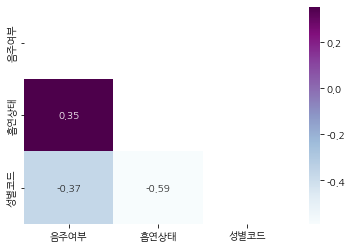

In [161]:
sns.heatmap(df_corr, mask=mask, annot=True, fmt='.2f', cmap='BuPu')

## Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?
- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [162]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [163]:
df['흡연상태'] = df2['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [164]:
df_pivot = pd.crosstab(index=df.음주여부, columns = df.흡연상태)
df_pivot

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연상태', ylabel='count'>

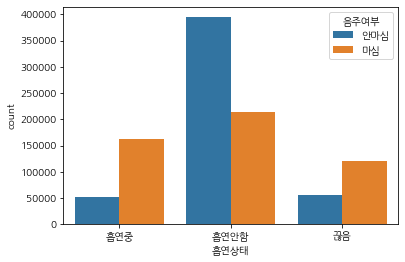

In [165]:
sns.countplot(data=df, x='흡연상태', hue='음주여부')

## Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [166]:
df1 = df[df['체중(5Kg 단위)']>=120]
df1

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1219,2017,1220,2,25~29세,41,170.0,120.0,116.0,0.7,0.9,...,47.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
2309,2017,2310,1,25~29세,30,190.0,155.0,127.0,0.8,0.9,...,19.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
3497,2017,3498,1,30~34세,46,175.0,120.0,119.0,1.2,1.2,...,111.0,흡연중,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
3685,2017,3686,1,30~34세,30,180.0,140.0,127.0,1.5,1.5,...,58.0,끊음,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
5788,2017,5789,1,35~39세,41,175.0,140.0,124.0,1.0,1.0,...,35.0,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,2017,996545,1,35~39세,41,175.0,125.0,121.0,1.2,1.2,...,76.0,흡연중,마심,1,NaN,NaN,NaN,NaN,1.0,20181126
996828,2017,996829,1,25~29세,47,180.0,120.0,109.0,1.5,1.5,...,82.0,흡연중,마심,1,NaN,NaN,NaN,NaN,1.0,20181126
997152,2017,997153,1,20~24세,47,180.0,120.0,115.0,0.7,0.8,...,165.0,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
997414,2017,997415,1,30~34세,46,170.0,135.0,129.0,1.0,1.2,...,62.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


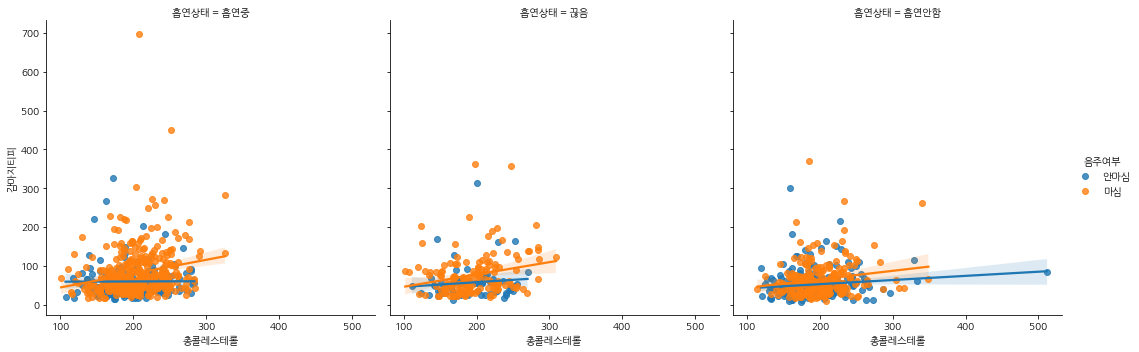

In [167]:
sns.lmplot(data=df1, x='총콜레스테롤',y='감마지티피', hue='음주여부', col='흡연상태')

## Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [168]:
import matplotlib.pyplot as plt

In [169]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,40~44세,41,165.0,55.0,70.0,1.5,1.5,...,11.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,40~44세,11,165.0,50.0,68.0,1.2,1.5,...,11.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,55~59세,27,155.0,50.0,83.8,0.2,1.0,...,12.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,50~54세,47,160.0,70.0,99.0,0.8,0.9,...,35.0,끊음,마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [170]:
df['시력(좌)'].unique()

array([1. , 1.2, 0.9, 1.5, 0.8, 0.7, 0.6, 0.2, 0.4, 0.5, 0.3, 0.1, 2. ,
       9.9, nan, 1.9, 1.6, 1.3, 1.7, 1.1, 2.5, 1.4, 1.8, 2.2, 2.1])

In [171]:
df['시력(우)'].unique()

array([1.2, 1. , 0.8, 1.5, 0.7, 0.9, 0.5, 0.2, 0.4, 0.3, 2. , 0.6, 0.1,
       9.9, nan, 1.6, 1.3, 1.9, 1.1, 1.7, 2.1, 1.8, 1.4, 2.5, 2.3])

In [172]:
df['시력(좌)'] = df['시력(좌)'].fillna(9.9)
df['시력(우)'] = df['시력(우)'].fillna(9.9)

In [173]:
df['시력(좌)'].unique()

array([1. , 1.2, 0.9, 1.5, 0.8, 0.7, 0.6, 0.2, 0.4, 0.5, 0.3, 0.1, 2. ,
       9.9, 1.9, 1.6, 1.3, 1.7, 1.1, 2.5, 1.4, 1.8, 2.2, 2.1])

In [174]:
df['시력(우)'].unique()

array([1.2, 1. , 0.8, 1.5, 0.7, 0.9, 0.5, 0.2, 0.4, 0.3, 2. , 0.6, 0.1,
       9.9, 1.6, 1.3, 1.9, 1.1, 1.7, 2.1, 1.8, 1.4, 2.5, 2.3])

In [175]:
mask = df['시력(좌)'].isin([9.9])
mask1 = df['시력(우)'].isin([9.9])
df = df[~mask]
df = df[~mask1]

C:\Users\alsgu\AppData\Local\Temp/ipykernel_15556/2362320540.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~mask1]


In [176]:
df['시력(좌)'].unique()

array([1. , 1.2, 0.9, 1.5, 0.8, 0.7, 0.6, 0.2, 0.4, 0.5, 0.3, 0.1, 2. ,
       1.9, 1.6, 1.3, 1.7, 1.1, 2.5, 1.4, 1.8, 2.2, 2.1])

In [177]:
df['시력(우)'].unique()

array([1.2, 1. , 0.8, 1.5, 0.7, 0.9, 0.5, 0.2, 0.4, 0.3, 2. , 0.6, 0.1,
       1.6, 1.3, 1.9, 1.1, 1.7, 2.1, 1.8, 1.4, 2.5, 2.3])

In [178]:
df = df.sort_values(by='연령대코드(5세단위)', ascending=True)

<AxesSubplot:xlabel='시력(우)', ylabel='연령대코드(5세단위)'>

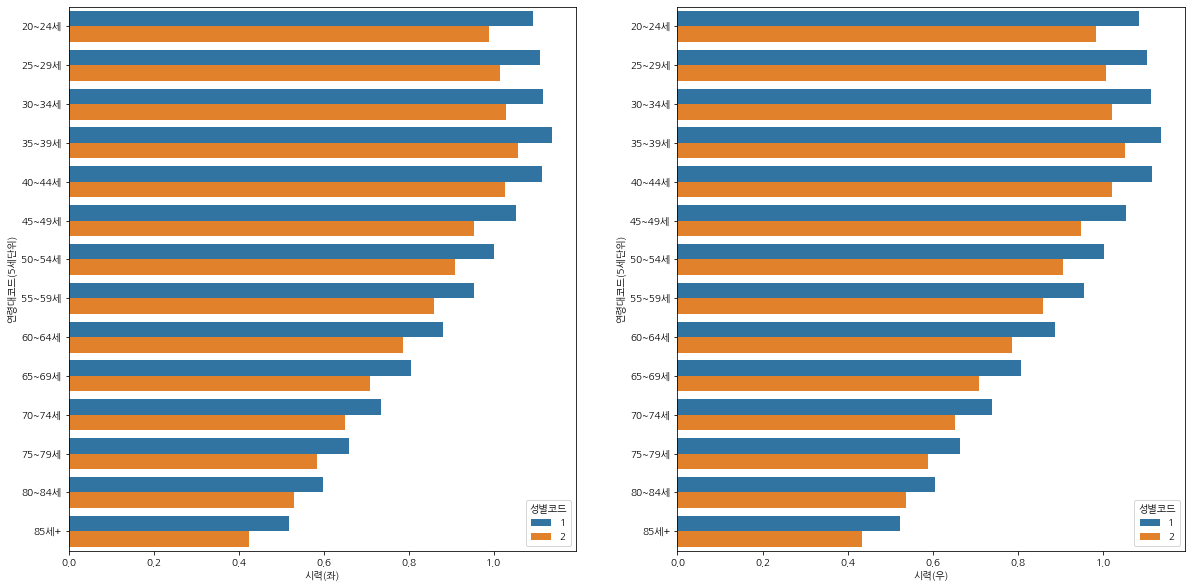

In [179]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=df, x='시력(좌)',y = '연령대코드(5세단위)', hue='성별코드', ci = None)

plt.subplot(1,2,2)
sns.barplot(data=df, x='시력(우)', y='연령대코드(5세단위)',hue='성별코드', ci=None)